In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_excel('wdbc.train.xlsx')
df_test = pd.read_excel('wdbc.test.xlsx')

In [3]:
train = df_train
test = df_test

In [4]:
train.shape

(342, 31)

In [5]:
test.shape

(227, 31)

In [6]:
train.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,...,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,14.130298,19.183304,91.987164,653.507310,0.096133,0.104362,0.088631,0.048942,0.180820,0.062727,...,16.216605,25.500760,106.850936,871.446784,0.131692,0.253884,0.269862,0.115268,0.289206,0.083868
std,3.466608,4.237974,23.868677,345.250264,0.013855,0.051231,0.079027,0.038682,0.027962,0.006722,...,4.697813,6.051405,32.371747,543.093072,0.022823,0.149757,0.201860,0.065673,0.061651,0.016741
min,7.729000,9.710000,47.920000,178.800000,0.052630,0.023440,0.000000,0.000000,0.116700,0.049960,...,8.952000,12.020000,56.650000,240.100000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.702500,16.210000,75.007500,418.975000,0.085553,0.063128,0.029500,0.019682,0.160325,0.057717,...,12.987500,21.345000,84.032500,513.925000,0.115300,0.151375,0.120575,0.065035,0.247725,0.071557
50%,13.370000,18.770000,87.175000,551.400000,0.095930,0.095090,0.061680,0.033770,0.179250,0.061455,...,14.980000,25.265000,97.980000,685.600000,0.131200,0.214850,0.229000,0.100550,0.281700,0.080090
75%,15.740000,21.815000,103.500000,777.400000,0.105375,0.130575,0.130900,0.070403,0.195850,0.066337,...,18.550000,29.312500,124.750000,1041.750000,0.144550,0.334150,0.384200,0.165350,0.317550,0.091990
max,28.110000,39.280000,188.500000,2499.000000,0.144700,0.286700,0.426800,0.201200,0.304000,0.095750,...,33.130000,49.540000,229.300000,3234.000000,0.222600,0.937900,1.252000,0.290300,0.577400,0.144600


In [7]:
import seaborn
import matplotlib.pyplot as plt

def plot_df(df, name):
  corr = df[df.columns].corr()
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  plt.figure(figsize=(20, 15))
  seaborn.set(font_scale=1.2)
  seaborn.heatmap(corr, mask=mask, center=0, annot=True,
    square=True, linewidths=3, alpha=0.7)
  plt.title(name)

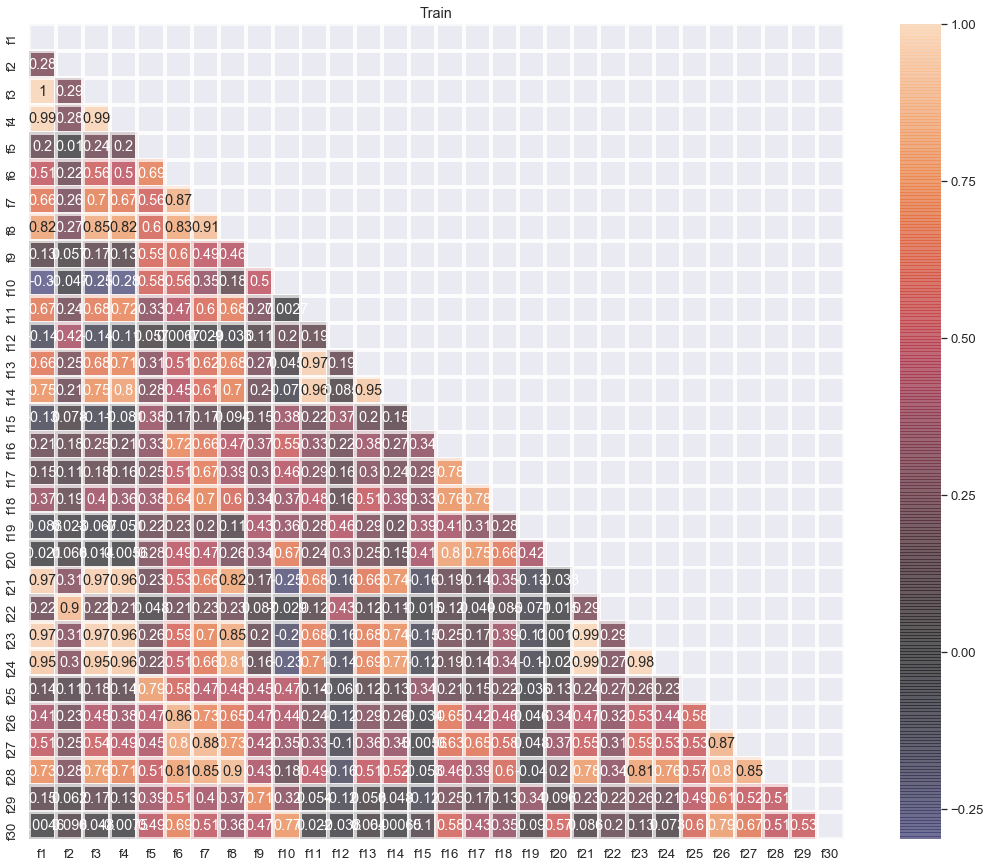

In [8]:
plot_df(train, 'Train')

In [9]:
print(train.columns)

Index(['class', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20',
       'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30'],
      dtype='object')


In [10]:
class_name = input("Chooese the class: ")

Chooese the class: class


In [11]:
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [12]:
temp_tr_ans = train[class_name]
temp_ts_ans = test[class_name]
class_count = len(temp_tr_ans.unique())
print(class_count)

2


In [13]:
temp_tr_ans

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     B
14     B
15     M
16     M
17     M
18     M
19     M
20     M
21     M
22     B
23     M
24     M
25     M
26     B
27     B
28     B
29     B
      ..
312    B
313    M
314    B
315    M
316    M
317    B
318    B
319    B
320    B
321    B
322    B
323    B
324    M
325    M
326    B
327    B
328    B
329    B
330    B
331    B
332    B
333    B
334    B
335    B
336    B
337    B
338    M
339    M
340    M
341    B
Name: class, Length: 342, dtype: object

In [14]:
temp_ts_ans

0      M
1      M
2      M
3      M
4      M
5      M
6      B
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     M
20     M
21     B
22     M
23     B
24     M
25     B
26     B
27     B
28     B
29     M
      ..
197    B
198    B
199    B
200    M
201    B
202    B
203    M
204    B
205    B
206    B
207    B
208    B
209    M
210    B
211    B
212    B
213    B
214    B
215    B
216    B
217    B
218    B
219    B
220    B
221    B
222    B
223    B
224    M
225    M
226    M
Name: class, Length: 227, dtype: object

In [15]:
tr_data = train.drop([class_name], axis=1)
ts_data = test.drop([class_name], axis=1)

In [16]:
# #결측치 채우기 if 결측치가 0일 경우

# from sklearn.impute import SimpleImputer

# rep_0 = SimpleImputer(missing_values=0, strategy="mean")

# tr_data = rep_0.fit_transform(tr_data)
# ts_data = rep_0.fit_transform(ts_data)

#결측치 채우기 if 결측치가 ?일 경우

# from sklearn.impute import SimpleImputer

# rep_0 = SimpleImputer(missing_values='?', strategy="mean")

# tr_data = rep_0.fit_transform(tr_data)
# ts_data = rep_0.fit_transform(ts_data)

In [17]:
mm_tr_data = minmax_scaler.fit_transform(tr_data)
mm_ts_data = minmax_scaler.transform(ts_data)
std_tr_data = standard_scaler.fit_transform(tr_data)
std_ts_data = standard_scaler.transform(ts_data)
tr_ans, _ = pd.factorize(temp_tr_ans, sort=True)
ts_ans, _ = pd.factorize(temp_ts_ans, sort=True)

In [18]:
tr_ans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [19]:
ts_ans

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [20]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn import metrics
from tensorflow.keras.regularizers import l2


In [21]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [22]:
# real Version


def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', 
                 activation = 'elu', kernel_regularizer=l2(0.001)):
  model = Sequential()
  model.add(Dense(neurons, input_dim=len(mm_tr_data.T), kernel_initializer=init_mode, activation=activation))
  for i in range(hidden_layers):
    
    model.add(Dense(neurons, kernel_initializer=init_mode, kernel_regularizer=kernel_regularizer))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))
  
  if class_count == 2:  
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  elif class_count != 2:
    model.add(Dense(class_count, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
  return model

In [23]:
keras_model = KerasClassifier(build_fn=create_model, epochs=64, batch_size=16)

In [24]:
leaky_relu = tf.nn.leaky_relu
hidden_layers = [4,8,12]
neurons = [32, 64, 128]
activation = ['elu', leaky_relu]
init_mode = ['glorot_uniform', 'he_normal']

In [25]:
param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
minmax_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)
std_grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=3)

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
minmax_grid_result = minmax_grid.fit(mm_tr_data, tr_ans)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/64
342/342 [==============================] - 1s 3ms/sample - loss: 0.9162 - acc: 0.8246
Epoch 2/64
342/342 [==============================] - 0s 126us/sample - loss: 0.7658 - acc: 0.9006
Epoch 3/64
342/342 [==============================] - 0s 126us/sample - loss: 0.6930 - acc: 0.9327
Epoch 4/64
342/342 [==============================] - 0s 123us/sample - loss: 0.7135 - acc: 0.9181
Epoch 5/64
342/342 [==============================] - 0s 126us/sample - loss: 0.6649 - acc: 0.9386
Epoch 6/64
342/342 [==============================] - ETA: 0s - loss: 0.5830 - acc: 1.000 - 0s 123us/sample - loss: 0.5979 - acc: 0.9620
Epoch 7/64
342/342 [==============================] - 0s 123us/sample - loss: 0.6657 - acc: 0.9327
Epoch 8/64
342/342 [================

In [28]:
std_grid_result = std_grid.fit(std_tr_data, tr_ans)

Epoch 1/64
342/342 [==============================] - 1s 4ms/sample - loss: 0.7684 - acc: 0.8918
Epoch 2/64
342/342 [==============================] - 0s 191us/sample - loss: 0.6666 - acc: 0.9211
Epoch 3/64
342/342 [==============================] - 0s 205us/sample - loss: 0.6474 - acc: 0.9503
Epoch 4/64
342/342 [==============================] - 0s 193us/sample - loss: 0.6548 - acc: 0.9503
Epoch 5/64
342/342 [==============================] - 0s 208us/sample - loss: 0.6586 - acc: 0.9269
Epoch 6/64
342/342 [==============================] - 0s 196us/sample - loss: 0.6087 - acc: 0.9386
Epoch 7/64
342/342 [==============================] - 0s 211us/sample - loss: 0.5895 - acc: 0.9591
Epoch 8/64
342/342 [==============================] - 0s 202us/sample - loss: 0.5441 - acc: 0.9678
Epoch 9/64
342/342 [==============================] - 0s 193us/sample - loss: 0.5828 - acc: 0.9591
Epoch 10/64
342/342 [==============================] - 0s 208us/sample - loss: 0.5964 - acc: 0.9357
Epoch 11/64

In [29]:
print("Scaler = minmax")
print("Best: %f using %s" % (minmax_grid_result.best_score_, minmax_grid_result.best_params_))
means = minmax_grid_result.cv_results_['mean_test_score']
stds = minmax_grid_result.cv_results_['std_test_score']
params = minmax_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Scaler = minmax
Best: 0.979532 using {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.935673 (0.041967) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.959064 (0.010941) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.950292 (0.036049) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.973684 (0.018950) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.979532 (0.010941) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.947368 (0.032822) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.970760 (0.004135) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.964912 (0.014324) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_unifor

In [30]:
print("Scaler = standard")
print("Best: %f using %s" % (std_grid_result.best_score_, std_grid_result.best_params_))
means = std_grid_result.cv_results_['mean_test_score']
stds = std_grid_result.cv_results_['std_test_score']
params = std_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Scaler = standard
Best: 0.982456 using {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.976608 (0.014909) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.976608 (0.008270) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 64}
0.982456 (0.012405) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'glorot_uniform', 'neurons': 128}
0.967836 (0.016541) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 32}
0.970760 (0.014909) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 64}
0.964912 (0.018950) with: {'activation': 'elu', 'hidden_layers': 4, 'init_mode': 'he_normal', 'neurons': 128}
0.967836 (0.004135) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'glorot_uniform', 'neurons': 32}
0.979532 (0.018025) with: {'activation': 'elu', 'hidden_layers': 8, 'init_mode': 'gloro

In [31]:
pred = minmax_grid.predict(mm_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

Accuracy =  0.9779735682819384
Confusion Matrix
[[141   1]
 [  4  81]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       142
         1.0       0.99      0.95      0.97        85

    accuracy                           0.98       227
   macro avg       0.98      0.97      0.98       227
weighted avg       0.98      0.98      0.98       227



In [32]:
pred = std_grid.predict(std_ts_data)

accuracy = accuracy_score(pred, ts_ans)
ts_ans = ts_ans.astype(float)
precision, recall, fbeta_score, support = precision_recall_fscore_support(ts_ans, pred)
conf_mat = confusion_matrix(ts_ans, pred)
print("Accuracy = ", accuracy)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(ts_ans, pred)))
print("")
print("Classification Report")
print(metrics.classification_report(ts_ans, pred))

Accuracy =  0.973568281938326
Confusion Matrix
[[141   1]
 [  5  80]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       142
         1.0       0.99      0.94      0.96        85

    accuracy                           0.97       227
   macro avg       0.98      0.97      0.97       227
weighted avg       0.97      0.97      0.97       227



In [33]:
# # testbed Version


# def create_model(hidden_layers = 1, neurons =1, init_mode = 'uniform', activation = 'elu'):
#     model = Sequential()
#     model.add(Dense(neurons, input_dim=len(tr_data.T), kernel_initializer=init_mode, activation=activation))

#     for i in range(hidden_layers):
        
#         model.add(Dense(neurons, kernel_initializer=init_mode))
#         model.add(BatchNormalization())
#         model.add(Activation(activation))
#         model.add(Dropout(0.2))
  
#     if class_count == 2:  
#         model.add(Dense(1,activation='sigmoid'))
#         model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     elif class_count != 2:
#         model.add(Dense(class_count-1, activation='softmax'))
#         model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#     return model


# hidden_layers = [5, 10]
# neurons = [32, 64]
# activation = ['elu']
# init_mode = ['he_uniform']

# keras_model = KerasClassifier(build_fn=create_model, epochs=4, batch_size=4)

# param_grid = dict(hidden_layers = hidden_layers, neurons = neurons, init_mode = init_mode, activation = activation)
# grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs= -1, cv=2)